# Normal distribution

This notebook examines the *normal distribution* and how it can be used to generate *binomial distributions* $B(n,p)$ with lower standard deviations $\sigma$ independent of $n$.

### Imports

In [140]:
from sympy import init_session
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
init_session()
output_notebook()

IPython console for SymPy 1.0 (Python 3.6.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


Loading BokehJS ...

## Visualization of normal distribution
First, we're gonna go about visualizing the normal distribution with standard deviation $\sigma$ and mean $\mu$.

In [141]:
x = symbols('x')
sigma, mu = symbols('sigma mu')

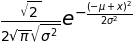

In [142]:
normal_distribution = 1/sqrt(2*pi*sigma**2)*exp(-(x-mu)**2/(2*sigma**2))
normal_distribution

In [143]:
lam_normal_distribution = lambdify(x, normal_distribution.subs([(mu,0),(sigma,6)]), modules=['numpy'])

x_vals = np.linspace(-20, 20, 1000)
y_vals = lam_normal_distribution(x_vals)

p = figure(plot_width=1000, plot_height=400)
p.line(x_vals, y_vals, line_width=2)
show(p)

## Binomial distribution
Next, we're gonna examine *binomial distributions* using the same variables $x$, $\sigma$ and $\mu$ as well as the number of trials $n$. Up until now, $\sigma$ and $\mu$ are dependent of $n$. We're aiming to change this soon.

In [144]:
n = symbols('n')

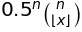

In [145]:
binomial_distribution = binomial(n,floor(x))*(1/2)**n
binomial_distribution

In [155]:
n = 20
values = [float(binomial_distribution.subs([('n',n),(x,i)])) for i in range(n+1)]

p = figure(plot_width=1000, plot_height=400)
p.vbar(x=range(n+1), top=values, width=0.8)
show(p)

Now, we're going to calculate the standard deviation $\sigma$ and the mean $\mu$.

In [156]:
mu = 1/2*n

sigma = sqrt(sum(values[i]*(i-mu)**2 for i in range(n)))

And we create a binomial distribution according to these values.

In [165]:
# Creating corresponding normal distribution
n_dist = normal_distribution.subs([('mu',mu),('sigma',sigma)])
# Only internally for numpy
lam_normal_distribution = lambdify(x, n_dist, modules=['numpy'])

x_vals = np.linspace(0, 20, 1000)
y_vals = lam_normal_distribution(x_vals)

p.line(x_vals, y_vals, line_width=2)
show(p)

In [167]:
integrate(n_dist, (x, -oo, oo)).n(10)

## Comparison
The sum of all values of the *binomial distribution* is equal to the overall integral of the *normal distribution*. Let us now find out which intervals of the *normal distribution* correspond with which parts of the *binomial distribution*.

In [161]:
values[int(mu)]

In [168]:
a = symbols('a')

In [180]:
integ = integrate(n_dist, (x,mu-a,mu+a))
lambda_integ = lambdify(a, integ, modules=['numpy'])

In [182]:
lambda_integ(3)

NameError: name 'erf' is not defined

### The next step is to get rid of symbolic computing and utilise the **scipy** integration functionalities instead!!!